<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/02_NN_regression_Medical_Cost_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NN regression with medicalcost Insurance dataset

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# one hot encoding to turn catagorical values
insurance_oht = pd.get_dummies(insurance)
insurance_oht

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
# create X and y values
X = insurance_oht.drop("charges", axis=1)
y = insurance_oht["charges"]

In [7]:
X.head(), y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [8]:
# Test train split
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [13]:
# build a Neural network

# Set random state
tf.random.set_seed(42)

#1. Create a model
insurance_model= tf.keras.Sequential([
                                      tf.keras.layers.Dense(100, activation="relu"),
                                      tf.keras.layers.Dense(1)
])

#2. Complile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
# Check the result of the model on test data
insurance_model.evaluate(X_test,y_test)


9/9 [==============================] - 0s 1ms/step - loss: 8032.4365 - mae: 8032.4365


[8032.4365234375, 8032.4365234375]

In [17]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

In [36]:
# Experiment to improve the model
# Set random state
tf.random.set_seed(42)

#1. Create a model
insurance_model_2= tf.keras.Sequential([
                                      tf.keras.layers.Dense(100, activation="relu"),
                                      tf.keras.layers.Dense(10, activation="relu"),
                                      tf.keras.layers.Dense(1)
])

#2. Complile the model
insurance_model_2.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                        metrics=["mae"])

#3. Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=500, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1783.9004 - mae: 1783.9004


[1783.900390625, 1783.900390625]

In [34]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1783.9004 - mae: 1783.9004


[1783.900390625, 1783.900390625]

In [35]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Text(0.5, 0, 'epochs')

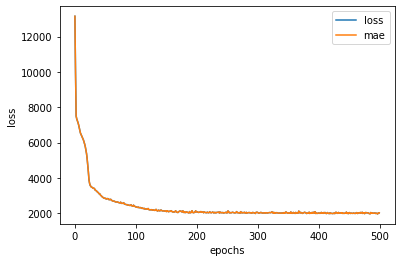

In [37]:
#plot the loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Feature scaling - Preprocessing Data(Normalization and Standardization)

In [38]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


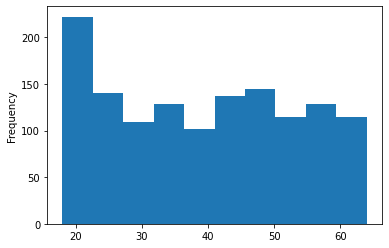

In [39]:
X["age"].plot(kind="hist")

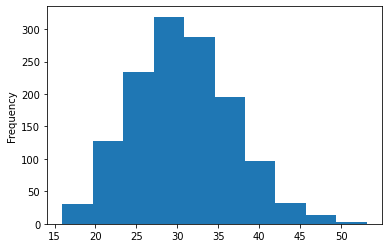

In [40]:
X["bmi"].plot(kind="hist")

In [41]:
X["age"].value_counts

<bound method IndexOpsMixin.value_counts of 0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64>

In [42]:
# import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [46]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a coloum transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

# Create X and Y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit coloum transformer to training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [48]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [49]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [52]:
#Model 3
# Set random state
tf.random.set_seed(42)

#1. Create a model
insurance_model_3= tf.keras.Sequential([
                                      tf.keras.layers.Dense(100, activation="relu"),
                                      tf.keras.layers.Dense(10, activation="relu"),
                                      tf.keras.layers.Dense(1)
])

#2. Complile the model
insurance_model_3.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                        metrics=["mae"])

#3. Fit the model
history = insurance_model_3.fit(X_train_normal, y_train, epochs=500, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [56]:
insurance_model_3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1740.1833 - mae: 1740.1833


[1740.183349609375, 1740.183349609375]

Text(0.5, 0, 'epochs')

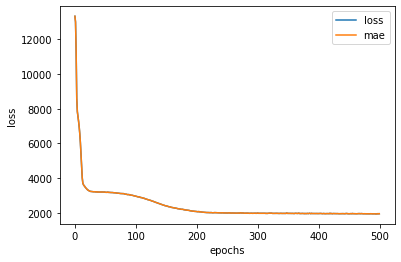

In [54]:
#plot the loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [57]:
insurance_model_3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [59]:
y_pred = insurance_model_3.predict(X_test_normal)

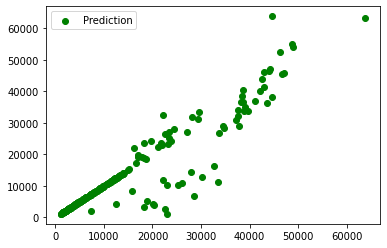

In [74]:

plt.scatter(y_test, y_pred, c="g", label="Prediction")

plt.legend();